# eScooter Analysis

In [17]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import plotly.express as px
from datetime import date, timedelta
import matplotlib.pyplot as plt
import missingno as msno

raw = pd.read_parquet('escooter_history.parquet', engine='fastparquet')

# Data preparation

In [18]:
# Split date time stamp into few features like Year, Month, Day, Hour, Minute, Weekday
raw['year'] = raw['datetime'].dt.year
raw['month'] = raw['datetime'].dt.month
raw['day'] = raw['datetime'].dt.day
raw['hour'] = raw['datetime'].dt.hour
raw['minute'] = raw['datetime'].dt.minute
raw['weekday'] = raw['datetime'].dt.strftime("%A")
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [19]:
# Add hot encoding columns for weather, remove old weather column
weather = pd.get_dummies(raw[['weather']], columns=['weather'])
df = pd.concat([raw, weather], axis=1) # add dummy columns to the data frame
df = df[['datetime', 'holiday', 'workingday', 'weekday', 'registered_customer','temp', 'atemp', 'humidity', 'windspeed', 'weather_clear, few clouds', 'weather_cloudy, mist', 'weather_heacy rain or thunderstorm or snow or ice pallets', 'weather_light snow or rain or thunderstorm', 'year', 'month', 'day', 'hour', 'minute']]
df_date = df.set_index('datetime')

In [ ]:
sns.set_palette("Set1", 12, .75)
df.head(3)

,datetime,holiday,workingday,weekday,registered_customer,temp,atemp,humidity,windspeed,"weather_clear, few clouds","weather_cloudy, mist",weather_heacy rain or thunderstorm or snow or ice pallets,weather_light snow or rain or thunderstorm,year,month,day,hour,minute
0,2019-01-01 00:00:09,0,0,Tuesday,True,9.84,14.395,81,0.0,1,0,0,0,2019,1,1,0,0
1,2019-01-01 00:00:41,0,0,Tuesday,True,9.84,14.395,81,0.0,1,0,0,0,2019,1,1,0,0
2,2019-01-01 00:01:20,0,0,Tuesday,True,9.84,14.395,81,0.0,1,0,0,0,2019,1,1,0,1


# Data Analysis

## Part 2: Head of department
### Support operational business

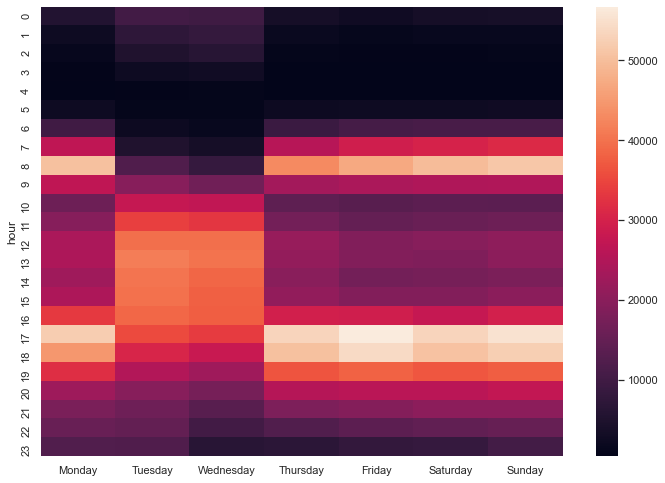

In [16]:
# Idee: Zeilen Jahr|Monat|Tag|Werktag, Spalte=Uhrzeit, count

weekday_dummy = pd.get_dummies(df[['weekday']], columns=['weekday'])
df_heat_hour2 = pd.concat([df, weekday_dummy], axis=1)

#df_heat_hour = df_heat_hour[['weekday', 'year', 'month', 'day', 'hour', 'hour_0', 'hour_1', 'hour_2', 'hour_3','hour_4','hour_5','hour_6','hour_7','hour_8','hour_9','hour_10','hour_11','hour_12','hour_14','hour_15','hour_16','hour_17','hour_18','hour_19','hour_20','hour_21','hour_21','hour_22','hour_23']]
df_heat_hour2 = df_heat_hour2.rename({'weekday_Monday': 'Monday', 'weekday_Tuesday': 'Tuesday', 'weekday_Wednesday': 'Wednesday', 'weekday_Thursday': 'Thursday', 'weekday_Friday': 'Friday', 'weekday_Saturday': 'Saturday', 'weekday_Sunday': 'Sunday'}, axis='columns')

df_heat_hour2 = df_heat_hour2[['hour', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]

#df_heat_hour = df_heat_hour.groupby(['weekday', 'year', 'month', 'day', 'hour']).sum(['hour_0', 'hour_1', 'hour_2', 'hour_3','hour_4','hour_5','hour_6','hour_7','hour_8','hour_9','hour_10','hour_11','hour_12','hour_14','hour_15','hour_16','hour_17','hour_18','hour_19','hour_20','hour_21','hour_21','hour_22','hour_23'])
df_heat_hour2 = df_heat_hour2.groupby(['hour']).sum(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])


#df_heat_hour2
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns_plot = sns.heatmap(df_heat_hour2)
sns_plot.figure.savefig("heatmap_hour_weekday.png")


<AxesSubplot:xlabel='Zeitraum', ylabel='Anzahl an Ausleihungen je Zeitraum'>

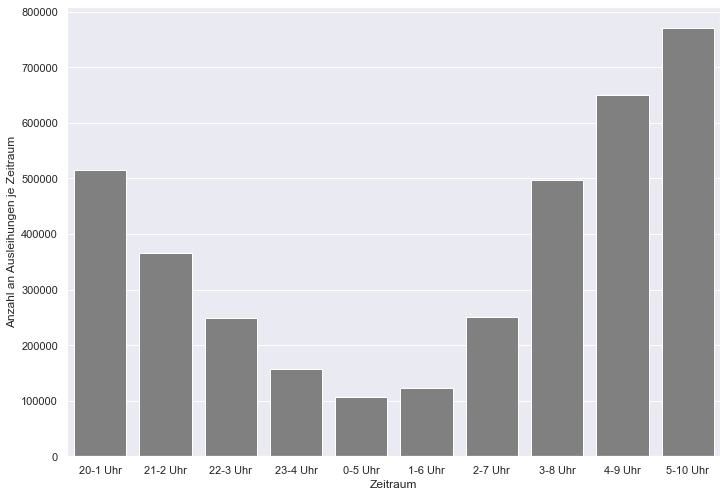

In [ ]:
#sns.countplot(x='hour', hue='month', data=df.loc[df.hour.isin([22,23,0,1,2,3])])

df_timeslot = pd.DataFrame({'Zeitraum': ['20-1 Uhr','21-2 Uhr', '22-3 Uhr', '23-4 Uhr', '0-5 Uhr', '1-6 Uhr', '2-7 Uhr', '3-8 Uhr', '4-9 Uhr', '5-10 Uhr'],
                            'Anzahl an Ausleihungen je Zeitraum': [len(df.loc[df.hour.isin([20,21,22,23,0,1])]),
                                        len(df.loc[df.hour.isin([21,22,23,0,1,2])]),
                                        len(df.loc[df.hour.isin([22,23,0,1,2,3])]),
                                        len(df.loc[df.hour.isin([23,0,1,2,3,4])]),
                                        len(df.loc[df.hour.isin([0,1,2,3,4,5])]),
                                        len(df.loc[df.hour.isin([1,2,3,4,5,6])]),
                                        len(df.loc[df.hour.isin([2,3,4,5,6,7])]),
                                        len(df.loc[df.hour.isin([3,4,5,6,7,8])]),
                                        len(df.loc[df.hour.isin([4,5,6,7,8,9])]),
                                        len(df.loc[df.hour.isin([5,6,7,8,9,10])])
                                        ]})
sns.set(rc={'figure.figsize':(11.7,8.27)})
  
sns.barplot(x=df_timeslot.Zeitraum, y=df_timeslot['Anzahl an Ausleihungen je Zeitraum'], color='grey') 
#sns_plot1.figure.savefig("lineplot.png")                         

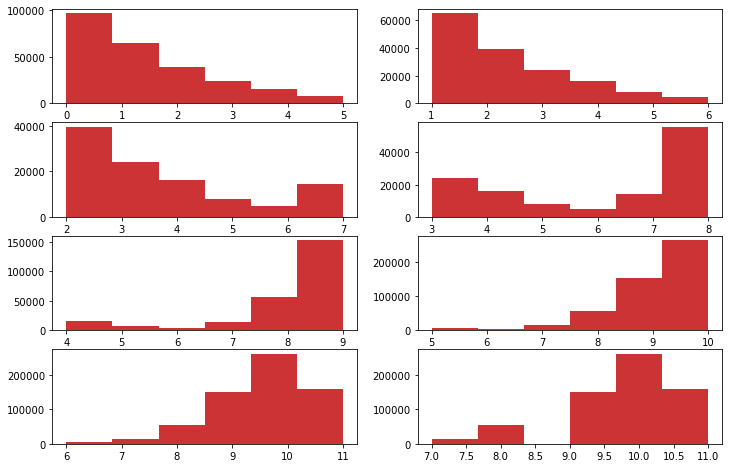

In [ ]:
# Weiß nicht, ob wir das reinnehmen sollen/wollen

start = 0
width = 6



fig, axes = plt.subplots(4, 2, figsize=(12, 8))

# This approach is better than looping through df.cat.unique
for i, ax in enumerate(axes.reshape(-1,1)):
    df_cropped = df.copy()
    df_cropped['hour'] = df_cropped['hour'].map({22:0,23:1, 0:2, 1:3, 2:4, 3:5, 4:6, 5:7, 6:8, 7:9, 8:10, 9:11, 11:13, 12:14, 13:15, 14:16, 15:17,16:18,17:19,18:20, 19:21,20:22, 21:23})
    df_cropped = df_cropped[(df_cropped['hour']>=i) & (df_cropped['hour']<i+width)]
    ax[0].hist(df_cropped['hour'], bins=width)


plt.show()